In [41]:
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt
import scipy.stats as sts

In [30]:
data_path = "../../resources/science-data/"
gw_df = pd.read_csv(data_path + "global_warming.csv")
gw_meta_df = pd.read_csv(data_path + "global_warming_meta.csv")
fips_df = pd.read_csv(data_path + "fips.csv")
mask_df = pd.read_csv(data_path + "mask-use-by-county.csv")

In [31]:
fips_df

,FIPS,Name,State
0,1001,Autauga,AL
1,1003,Baldwin,AL
2,1005,Barbour,AL
3,1007,Bibb,AL
4,1009,Blount,AL
...,...,...,...
3227,72151,Yabucoa,PR
3228,72153,Yauco,PR
3229,78010,St. Croix,VI
3230,78020,St. John,VI


In [32]:
# happening = gw_df[['']]
gw_df = gw_df.groupby('GeoType').get_group('County')

In [33]:
gw_df = gw_df[['GeoType', 'GEOID', 'happening', 'happeningOppose', 'human', 'humanOppose']]
gw_df.head(10)

,GeoType,GEOID,happening,happeningOppose,human,humanOppose
52,County,1001,58.925,17.910,46.619,41.905
53,County,1003,60.590,19.028,46.056,41.122
54,County,1005,66.975,10.476,51.662,38.378
55,County,1007,57.679,18.117,44.925,43.474
56,County,1009,52.372,23.976,43.147,43.863
57,County,1011,72.330,6.084,55.475,35.354
58,County,1013,65.254,11.606,49.914,39.705
59,County,1015,61.336,17.174,49.208,39.287
60,County,1017,64.602,12.533,48.617,41.066
61,County,1019,56.216,21.712,44.947,42.492


In [34]:
gw_meta_df.head(10)

,YCOM.VARIABLE.NAME,VARIABLE.DESCRIPTION
0,GeoType,Geographic level
1,GEOID,Geographic abbreviation
2,GeoName,Geographic name
3,TotalPop,Total population
4,happening,Estimated percentage who think that global war...
5,happeningOppose,Estimated percentage who do not think that glo...
6,human,Estimated percentage who think that global war...
7,humanOppose,Estimated percentage who think that global war...
8,consensus,Estimated percentage who believe that most sci...
9,consensusOppose,Estimated percentage who believe there is a lo...


In [38]:
df = mask_df.merge(gw_df, how='inner', left_on='COUNTYFP', right_on='GEOID')
df = df.rename(columns={'COUNTYFP': 'FIPS', 'NEVER': 'Mask-Never', 'RARELY': 'Mask-Rarely', 'SOMETIMES': 'Mask-Sometimes', 'FREQUENTLY': 'Mask-Frequent', 'ALWAYS': 'Mask-Always', 'happening': 'GW-Happening', 'happeningOppose': 'GW-Not-Happening', 'human': 'GW-Human-Caused', 'humanOppose': 'GW-Not-Human-Caused'})
df = df.drop(['GeoType', 'GEOID'], axis=1)
df.head()

,FIPS,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequent,Mask-Always,GW-Happening,GW-Not-Happening,GW-Human-Caused,GW-Not-Human-Caused
0,1001,0.053,0.074,0.134,0.295,0.444,58.925,17.910,46.619,41.905
1,1003,0.083,0.059,0.098,0.323,0.436,60.590,19.028,46.056,41.122
2,1005,0.067,0.121,0.120,0.201,0.491,66.975,10.476,51.662,38.378
3,1007,0.020,0.034,0.096,0.278,0.572,57.679,18.117,44.925,43.474
4,1009,0.053,0.114,0.180,0.194,0.459,52.372,23.976,43.147,43.863


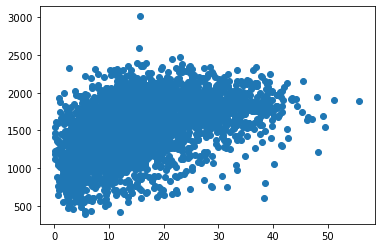

In [46]:
mask_skeptic = 100 * (df['Mask-Never'] + df['Mask-Rarely'])
gw_skeptic = 100 * df['GW-Not-Happening']
plt.scatter(mask_skeptic, gw_skeptic)
plt.show()

In [47]:
slope, intercept, r_value, p_value, std_err = sts.linregress(mask_skeptic, gw_skeptic)
print(f"r-squared: {r_value ** 2}")

r-squared: 0.21461612169832125
